<a href="https://colab.research.google.com/github/jaityagi123/Assignment-2/blob/main/class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Decision **Tree**

In [ ]:
!pip install matplotlib

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier()
model.fit(X, y)
feature_importances = model.feature_importances_

NameError: name 'y' is not defined

# New Section

In [ ]:

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
INFOSYS= pd.read_csv("/content/INFY.NS.csv")
INFOSYS = INFOSYS.dropna()
INFOSYS = INFOSYS[['Date','Open', 'High', 'Low','Close','Adj Close','Volume']]
INFOSYS.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-01,494.5,502.500000,493.000000,498.700012,415.561249,6880852.0
1,2015-07-02,499.5,500.700012,492.524994,494.000000,411.644745,4007568.0
2,2015-07-03,494.0,496.500000,491.000000,495.149994,412.603058,2695306.0
3,2015-07-06,492.5,494.000000,487.500000,491.649994,409.686493,4305602.0
4,2015-07-07,492.5,495.000000,489.500000,490.250000,408.519897,3497418.0


In [ ]:
INFOSYS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1.227000e+03
mean,605.359984,611.994194,598.518723,605.161715,557.417386,8.675740e+06
std,103.981567,105.130168,103.068678,104.111674,118.345056,7.941786e+06
min,440.000000,443.799988,430.000000,436.700012,390.604187,7.589560e+05
25%,514.187500,519.762482,509.349991,513.974976,451.269745,5.361510e+06
50%,586.025024,592.450012,580.000000,585.950012,517.107422,7.023516e+06
75%,704.924988,711.725006,695.975006,704.262512,676.590088,9.551616e+06
max,843.299988,847.000000,835.049988,840.150024,810.035217,1.644050e+08


In [ ]:
INFOSYS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1227 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1227 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 109.0+ KB


In [ ]:
!pip install chart_studio

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
layout = go.Layout(
    title='STOCK PRICE OF INFOSYS',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
INFOSYS_DATA = [{'x':INFOSYS['Date'], 'y':INFOSYS['Close']}]
plot = go.Figure(data=INFOSYS_DATA, layout=layout)


In [ ]:
iplot(plot)

In [ ]:
INFOSYS['Open-Close']= INFOSYS.Close - INFOSYS.Open
INFOSYS['High-Low']  = INFOSYS.High - INFOSYS.Low
INFOSYS = INFOSYS.dropna()
X= INFOSYS[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,4.200012,9.500000
1,-5.500000,8.175018
2,1.149994,5.500000
3,-0.850006,6.500000
4,-2.250000,5.500000


In [ ]:
Y= np.where(INFOSYS['Adj Close'].shift(-1)>INFOSYS['Adj Close'],1,-1)

In [ ]:
split_percentage = 0.8
split = int(split_percentage*len(INFOSYS))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%pylab inline
%matplotlib inline

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
print(model)

accuracy_train = accuracy_score(Y_train, model.predict(X_train))
accuracy_test = accuracy_score(Y_test, model.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Populating the interactive namespace from numpy and matplotlib
DecisionTreeClassifier()
Train_data Accuracy: 1.00
Test_data Accuracy: 0.55


In [ ]:
model.score(X_train, Y_train)

1.0

In [ ]:
model.score(X_test,Y_test)

0.5528455284552846

In [ ]:
probability = model.predict_proba(X_test)
print(probability)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 

In [ ]:
predicted = model.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.confusion_matrix(Y_test, predicted))

[[67 49]
 [61 69]]


In [ ]:
import matplotlib.pyplot as plt

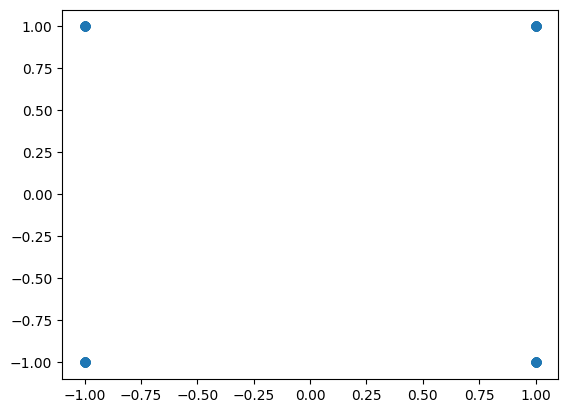

In [ ]:
plt.scatter(Y_test, predicted)

Text(0.5, 1.0, 'Actual vs Predicted Values')

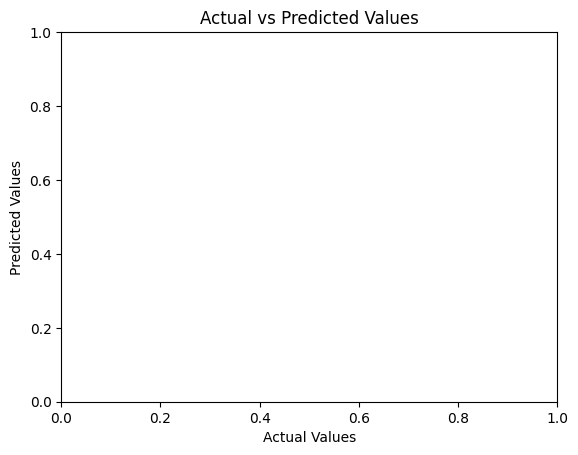

In [ ]:
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

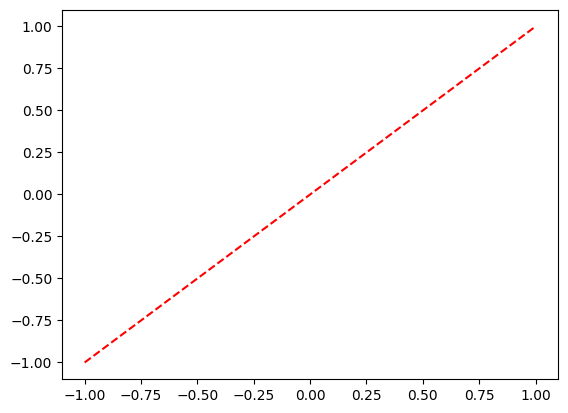

In [ ]:
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--')

In [ ]:
plt.show()

In [ ]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.52      0.55      0.53       116
           1       0.57      0.54      0.56       130

    accuracy                           0.54       246
   macro avg       0.54      0.55      0.54       246
weighted avg       0.55      0.54      0.55       246



In [ ]:
print(model.score(X_train,Y_train))

1.0


In [ ]:
print(model.score(X_test,Y_test))

0.5447154471544715


In [ ]:
for line in code.splitlines():
    if "SelectKBest" in line or "RFE" in line or "SelectFromModel" in line:
        print("Feature selection is used.")
        break

NameError: name 'code' is not defined

4.**K**-NEAREST-**NEIGHBORS**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
INFOSYS= pd.read_csv("/content/INFY.NS.csv")
INFOSYS = INFOSYS.dropna()
INFOSYS = INFOSYS[['Date','Open', 'High', 'Low','Close','Adj Close','Volume']]
INFOSYS.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-01,494.5,502.500000,493.000000,498.700012,415.561249,6880852.0
1,2015-07-02,499.5,500.700012,492.524994,494.000000,411.644745,4007568.0
2,2015-07-03,494.0,496.500000,491.000000,495.149994,412.603058,2695306.0
3,2015-07-06,492.5,494.000000,487.500000,491.649994,409.686493,4305602.0
4,2015-07-07,492.5,495.000000,489.500000,490.250000,408.519897,3497418.0


In [ ]:
INFOSYS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1.227000e+03
mean,605.359984,611.994194,598.518723,605.161715,557.417386,8.675740e+06
std,103.981567,105.130168,103.068678,104.111674,118.345056,7.941786e+06
min,440.000000,443.799988,430.000000,436.700012,390.604187,7.589560e+05
25%,514.187500,519.762482,509.349991,513.974976,451.269745,5.361510e+06
50%,586.025024,592.450012,580.000000,585.950012,517.107422,7.023516e+06
75%,704.924988,711.725006,695.975006,704.262512,676.590088,9.551616e+06
max,843.299988,847.000000,835.049988,840.150024,810.035217,1.644050e+08


In [ ]:
INFOSYS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1227 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 109.0+ KB


In [ ]:
!pip install chart_studio

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
layout = go.Layout(
    title='STOCK PRICE OF INFOSYS',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
INFOSYS_DATA = [{'x':INFOSYS['Date'], 'y':INFOSYS['Close']}]
plot = go.Figure(data=INFOSYS_DATA, layout=layout)

In [ ]:
iplot(plot)

In [ ]:
INFOSYS['Open-Close']= INFOSYS.Close - INFOSYS.Open
INFOSYS['High-Low']  = INFOSYS.High - INFOSYS.Low
INFOSYS = INFOSYS.dropna()
X= INFOSYS[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,4.200012,9.500000
1,-5.500000,8.175018
2,1.149994,5.500000
3,-0.850006,6.500000
4,-2.250000,5.500000


In [ ]:
Y= np.where(INFOSYS['Close'].shift(-1)>INFOSYS['Close'],1,-1)

In [ ]:
split_percentage = 0.7
split = int(split_percentage*len(INFOSYS))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.63
Test_data Accuracy: 0.43


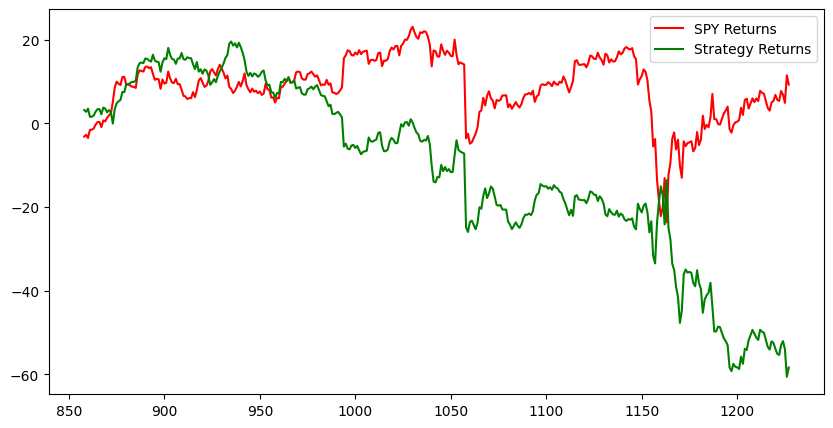

In [ ]:
INFOSYS['Predicted_Signal'] = knn.predict(X)

INFOSYS['SPY_returns'] = np.log(INFOSYS['Close']/INFOSYS['Close'].shift(1))
Cumulative_SPY_returns = INFOSYS[split:]['SPY_returns'].cumsum()*100

INFOSYS['Startegy_returns'] = INFOSYS['SPY_returns']* INFOSYS['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = INFOSYS[split:]['Startegy_returns'].cumsum()*100

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

logistic **regression**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
INFOSYS= pd.read_csv("/content/INFY.NS.csv")
INFOSYS = INFOSYS.dropna()
INFOSYS = INFOSYS[['Date','Open', 'High', 'Low','Close','Adj Close','Volume']]
INFOSYS.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-01,494.5,502.500000,493.000000,498.700012,415.561249,6880852.0
1,2015-07-02,499.5,500.700012,492.524994,494.000000,411.644745,4007568.0
2,2015-07-03,494.0,496.500000,491.000000,495.149994,412.603058,2695306.0
3,2015-07-06,492.5,494.000000,487.500000,491.649994,409.686493,4305602.0
4,2015-07-07,492.5,495.000000,489.500000,490.250000,408.519897,3497418.0


In [ ]:
INFOSYS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1.227000e+03
mean,605.359984,611.994194,598.518723,605.161715,557.417386,8.675740e+06
std,103.981567,105.130168,103.068678,104.111674,118.345056,7.941786e+06
min,440.000000,443.799988,430.000000,436.700012,390.604187,7.589560e+05
25%,514.187500,519.762482,509.349991,513.974976,451.269745,5.361510e+06
50%,586.025024,592.450012,580.000000,585.950012,517.107422,7.023516e+06
75%,704.924988,711.725006,695.975006,704.262512,676.590088,9.551616e+06
max,843.299988,847.000000,835.049988,840.150024,810.035217,1.644050e+08


In [ ]:
INFOSYS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1227 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 109.0+ KB


In [ ]:
INFOSYS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1.227000e+03
mean,605.359984,611.994194,598.518723,605.161715,557.417386,8.675740e+06
std,103.981567,105.130168,103.068678,104.111674,118.345056,7.941786e+06
min,440.000000,443.799988,430.000000,436.700012,390.604187,7.589560e+05
25%,514.187500,519.762482,509.349991,513.974976,451.269745,5.361510e+06
50%,586.025024,592.450012,580.000000,585.950012,517.107422,7.023516e+06
75%,704.924988,711.725006,695.975006,704.262512,676.590088,9.551616e+06
max,843.299988,847.000000,835.049988,840.150024,810.035217,1.644050e+08


In [ ]:
!pip install chart_studio

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
layout = go.Layout(
    title='STOCK PRICE OF INFOSYS',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
INFOSYS_DATA = [{'x':INFOSYS['Date'], 'y':INFOSYS['Close']}]
plot = go.Figure(data=INFOSYS_DATA, layout=layout)

In [ ]:
iplot(plot)


In [ ]:
INFOSYS['Open-Close']= INFOSYS.Close - INFOSYS.Open
INFOSYS['High-Low']  = INFOSYS.High - INFOSYS.Low
INFOSYS = INFOSYS.dropna()
X= INFOSYS[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,4.200012,9.500000
1,-5.500000,8.175018
2,1.149994,5.500000
3,-0.850006,6.500000
4,-2.250000,5.500000


In [ ]:
Y= np.where(INFOSYS['Close'].shift(-1)>INFOSYS['Close'],1,-1)

In [ ]:
split_percentage = 0.7
split = int(split_percentage*len(INFOSYS))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
model = LogisticRegression()
model = model.fit (X_train,Y_train)
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open-Close,[-0.007390438319856353]
1,High-Low,[-0.005753108670257018]


In [ ]:
probability = model.predict_proba(X_test)
print(probability)

[[0.47610588 0.52389412]
 [0.47891688 0.52108312]
 [0.48600911 0.51399089]
 [0.50555454 0.49444546]
 [0.48043233 0.51956767]
 [0.4845588  0.5154412 ]
 [0.50262667 0.49737333]
 [0.50039914 0.49960086]
 [0.49230357 0.50769643]
 [0.49074472 0.50925528]
 [0.50735812 0.49264188]
 [0.48133257 0.51866743]
 [0.49602322 0.50397678]
 [0.48766037 0.51233963]
 [0.5023712  0.4976288 ]
 [0.48865116 0.51134884]
 [0.54608164 0.45391836]
 [0.50370086 0.49629914]
 [0.48729157 0.51270843]
 [0.49357111 0.50642889]
 [0.51458682 0.48541318]
 [0.50672543 0.49327457]
 [0.47709609 0.52290391]
 [0.50649983 0.49350017]
 [0.50155087 0.49844913]
 [0.49150269 0.50849731]
 [0.5055264  0.4944736 ]
 [0.49358607 0.50641393]
 [0.55722427 0.44277573]
 [0.51399325 0.48600675]
 [0.49467347 0.50532653]
 [0.51070428 0.48929572]
 [0.5100165  0.4899835 ]
 [0.49148606 0.50851394]
 [0.50419339 0.49580661]
 [0.48402989 0.51597011]
 [0.48711873 0.51288127]
 [0.4800087  0.5199913 ]
 [0.49692203 0.50307797]
 [0.49193132 0.50806868]


In [ ]:
predicted = model.predict(X_test)

In [ ]:
print(metrics.confusion_matrix(Y_test, predicted))

[[ 79  96]
 [ 66 128]]


In [ ]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.54      0.45      0.49       175
           1       0.57      0.66      0.61       194

    accuracy                           0.56       369
   macro avg       0.56      0.56      0.55       369
weighted avg       0.56      0.56      0.56       369



In [ ]:
print(model.score(X_test,Y_test))

0.5609756097560976


In [ ]:
print(model.score(X_train,Y_train))

0.513986013986014


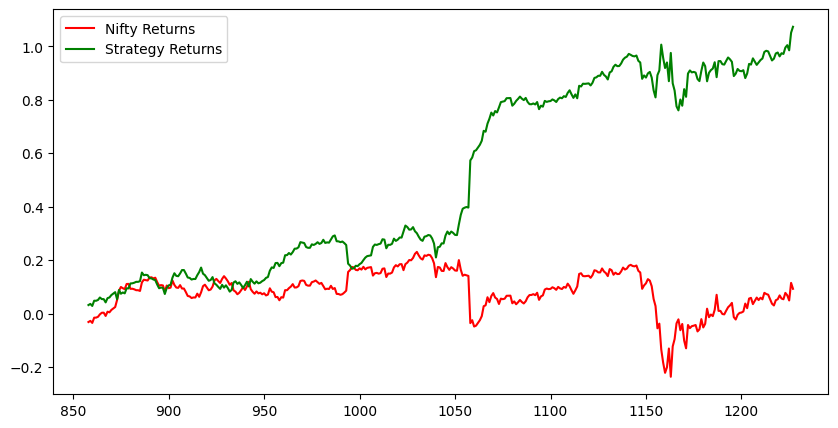

In [ ]:
INFOSYS['Predicted_Signal'] = model.predict(X)
INFOSYS['Nifty_returns'] = np.log(INFOSYS['Close']/INFOSYS['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(INFOSYS[split:]['Nifty_returns'])

INFOSYS['Startegy_returns'] = INFOSYS['Nifty_returns']* INFOSYS['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(INFOSYS[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [ ]:
print('Accuracy of Infosys_Stock_Market_Price_Prediction using Logistic Regression ',model.score(X_test,Y_test))

Accuracy of Infosys_Stock_Market_Price_Prediction using Logistic Regression  0.5609756097560976


In [ ]:
cross_val = cross_val_score(LogisticRegression(), X, Y, scoring='accuracy', cv=100)
print('Accuracy of Infosys_Stock_Market_Price_Prediction after Cross_validation')
print(cross_val)
print(cross_val.mean())

Accuracy of Infosys_Stock_Market_Price_Prediction after Cross_validation
[0.38461538 0.61538462 0.53846154 0.69230769 0.46153846 0.30769231
 0.53846154 0.38461538 0.53846154 0.46153846 0.61538462 0.23076923
 0.46153846 0.53846154 0.53846154 0.53846154 0.53846154 0.61538462
 0.53846154 0.46153846 0.69230769 0.53846154 0.76923077 0.46153846
 0.53846154 0.61538462 0.38461538 0.33333333 0.41666667 0.58333333
 0.41666667 0.75       0.5        0.5        0.5        0.75
 0.58333333 0.41666667 0.41666667 0.58333333 0.66666667 0.5
 0.5        0.5        0.41666667 0.41666667 0.25       0.25
 0.33333333 0.5        0.66666667 0.41666667 0.5        0.66666667
 0.58333333 0.5        0.5        0.33333333 0.66666667 0.5
 0.66666667 0.58333333 0.5        0.5        0.5        0.5
 0.58333333 0.41666667 0.5        0.75       0.41666667 0.66666667
 0.5        0.41666667 0.41666667 0.5        0.58333333 0.58333333
 0.5        0.41666667 0.75       0.41666667 0.5        0.58333333
 0.66666667 0.58333333

**Random_Forest_Classifier**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
INFOSYS= pd.read_csv("/content/INFY.NS.csv")
INFOSYS = INFOSYS.dropna()
INFOSYS = INFOSYS[['Date','Open', 'High', 'Low','Close','Adj Close','Volume']]
INFOSYS.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-01,494.5,502.500000,493.000000,498.700012,415.561249,6880852.0
1,2015-07-02,499.5,500.700012,492.524994,494.000000,411.644745,4007568.0
2,2015-07-03,494.0,496.500000,491.000000,495.149994,412.603058,2695306.0
3,2015-07-06,492.5,494.000000,487.500000,491.649994,409.686493,4305602.0
4,2015-07-07,492.5,495.000000,489.500000,490.250000,408.519897,3497418.0


In [ ]:
INFOSYS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1.227000e+03
mean,605.359984,611.994194,598.518723,605.161715,557.417386,8.675740e+06
std,103.981567,105.130168,103.068678,104.111674,118.345056,7.941786e+06
min,440.000000,443.799988,430.000000,436.700012,390.604187,7.589560e+05
25%,514.187500,519.762482,509.349991,513.974976,451.269745,5.361510e+06
50%,586.025024,592.450012,580.000000,585.950012,517.107422,7.023516e+06
75%,704.924988,711.725006,695.975006,704.262512,676.590088,9.551616e+06
max,843.299988,847.000000,835.049988,840.150024,810.035217,1.644050e+08


In [ ]:
INFOSYS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1227 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 109.0+ KB


In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
layout = go.Layout(
    title='STOCK PRICE OF INFOSYS',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
INFOSYS_DATA = [{'x':INFOSYS['Date'], 'y':INFOSYS['Close']}]
plot = go.Figure(data=INFOSYS_DATA, layout=layout)

In [ ]:
iplot(plot)

In [ ]:
INFOSYS['Open-Close']= INFOSYS.Close - INFOSYS.Open
INFOSYS['High-Low']  = INFOSYS.High - INFOSYS.Low
INFOSYS = INFOSYS.dropna()
X= INFOSYS[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,4.200012,9.500000
1,-5.500000,8.175018
2,1.149994,5.500000
3,-0.850006,6.500000
4,-2.250000,5.500000


In [ ]:
Y= np.where(INFOSYS['Close'].shift(-1)>INFOSYS['Close'],1,-1)

In [ ]:
split_percentage = 0.8
split = int(split_percentage*len(INFOSYS))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
scores = []

for num_trees in range(1,41):
    clf = RandomForestClassifier(n_estimators = num_trees)
    scores.append(cross_val_score(clf, X, Y, cv=10))

In [ ]:
print(scores[0])

[0.5203252  0.45528455 0.44715447 0.47154472 0.54471545 0.5203252
 0.46341463 0.46721311 0.49180328 0.44262295]


In [ ]:
print(scores[1])

[0.51219512 0.45528455 0.4796748  0.54471545 0.59349593 0.49593496
 0.48780488 0.47540984 0.51639344 0.46721311]


In [ ]:
rfc = RandomForestClassifier(n_estimators=16)

In [ ]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=16)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

          -1       0.44      0.47      0.45       116
           1       0.49      0.46      0.48       130

    accuracy                           0.46       246
   macro avg       0.46      0.46      0.46       246
weighted avg       0.47      0.46      0.46       246



In [ ]:
print(confusion_matrix(Y_test, rfc_pred))

[[54 62]
 [70 60]]


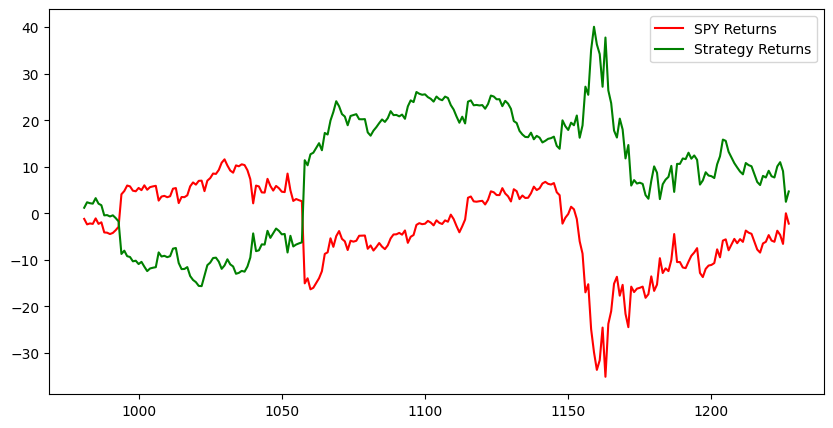

In [ ]:
INFOSYS['Predicted_Signal'] = rfc.predict(X)

INFOSYS['SPY_returns'] = np.log(INFOSYS['Close']/INFOSYS['Close'].shift(1))
Cumulative_SPY_returns = INFOSYS[split:]['SPY_returns'].cumsum()*100

INFOSYS['Startegy_returns'] = INFOSYS['SPY_returns']* INFOSYS['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = INFOSYS[split:]['Startegy_returns'].cumsum()*100

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [ ]:
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_SPY_returns)/Std
Sharpe = Sharpe.mean()
print ('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: 0.92


In [ ]:
model = rfc.fit(X_train, Y_train)
model = rfc.fit (X_train,Y_train)

In [ ]:
probability = model.predict_proba(X_test)
print(probability)

[[0.75   0.25  ]
 [0.6875 0.3125]
 [0.0625 0.9375]
 [0.0625 0.9375]
 [0.625  0.375 ]
 [0.75   0.25  ]
 [0.1875 0.8125]
 [0.4375 0.5625]
 [0.125  0.875 ]
 [0.1875 0.8125]
 [0.9375 0.0625]
 [0.75   0.25  ]
 [0.6875 0.3125]
 [0.1875 0.8125]
 [0.5    0.5   ]
 [0.4375 0.5625]
 [0.3125 0.6875]
 [0.6875 0.3125]
 [0.875  0.125 ]
 [0.75   0.25  ]
 [0.5    0.5   ]
 [0.3125 0.6875]
 [0.25   0.75  ]
 [0.1875 0.8125]
 [0.6875 0.3125]
 [0.75   0.25  ]
 [0.5625 0.4375]
 [0.4375 0.5625]
 [0.3125 0.6875]
 [0.6875 0.3125]
 [0.1875 0.8125]
 [0.4375 0.5625]
 [0.4375 0.5625]
 [0.875  0.125 ]
 [0.875  0.125 ]
 [0.     1.    ]
 [0.4375 0.5625]
 [0.5    0.5   ]
 [0.0625 0.9375]
 [0.625  0.375 ]
 [0.5625 0.4375]
 [0.5    0.5   ]
 [0.4375 0.5625]
 [0.4375 0.5625]
 [0.375  0.625 ]
 [0.625  0.375 ]
 [0.625  0.375 ]
 [0.6875 0.3125]
 [0.1875 0.8125]
 [0.8125 0.1875]
 [0.5    0.5   ]
 [0.125  0.875 ]
 [0.3125 0.6875]
 [0.6875 0.3125]
 [0.25   0.75  ]
 [0.5    0.5   ]
 [0.5    0.5   ]
 [0.8125 0.1875]
 [0.9375 0.062

In [ ]:
predicted = rfc.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.confusion_matrix(Y_test, predicted))

[[55 61]
 [69 61]]


In [ ]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.44      0.47      0.46       116
           1       0.50      0.47      0.48       130

    accuracy                           0.47       246
   macro avg       0.47      0.47      0.47       246
weighted avg       0.47      0.47      0.47       246



In [ ]:
print(model.score(X_train,Y_train))

0.9887869520897044


In [ ]:
print(model.score(X_test,Y_test))

0.4715447154471545


In [ ]:
x=4
print(x)
x="GFG"
x+="Hello"
print(x)

4
GFGHello
